In [67]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# load dataset
crop_data=pd.read_csv('crop production data.csv')

In [30]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


data preprocessing  

In [31]:
# type
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [32]:
# Statistical summary of numerical columns
crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [33]:
# Summary information about the dataset
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [34]:
# checking any null value
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [35]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

Data visulzation 
Overview of Crop Production in India

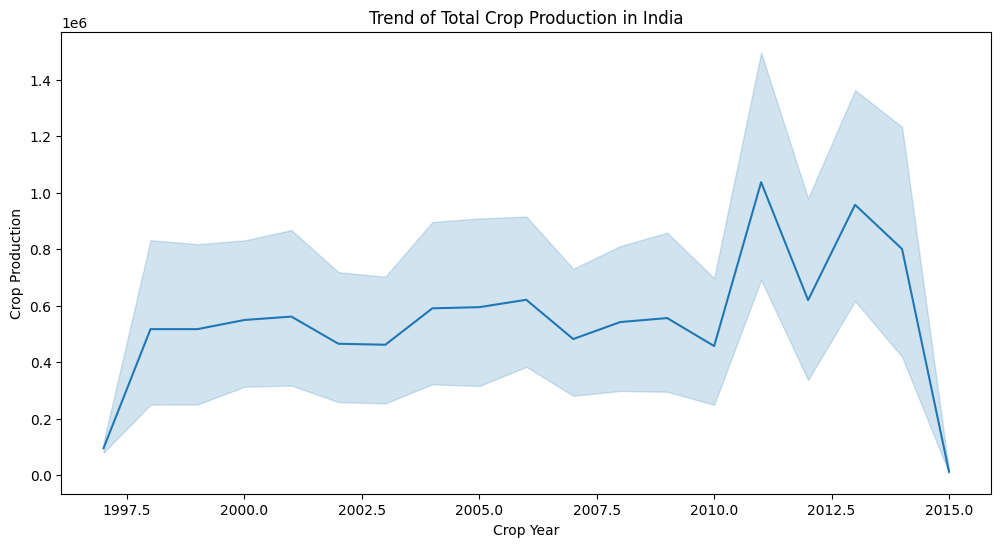

In [36]:
# Line chart showing the trend of total crop production in India over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=crop_data)
plt.title('Trend of Total Crop Production in India')
plt.xlabel('Crop Year')
plt.ylabel('Crop Production')
plt.show()

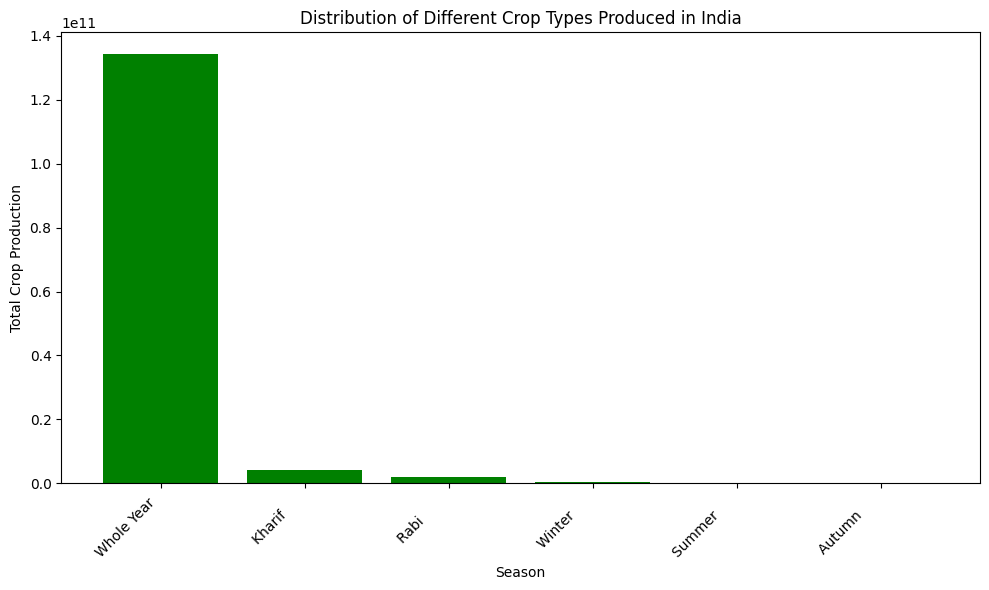

In [37]:
# Bar chart depicting the distribution of different crop types produced in India.
# Group the data by crop type and calculate the total production for each crop
crop_type_distribution = crop_data.groupby('Season')['Production'].sum().reset_index()

# Sort the data by crop production in descending order for better visualization
crop_type_distribution = crop_type_distribution.sort_values(by='Production', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(crop_type_distribution['Season'], crop_type_distribution['Production'], color='green')
plt.title('Distribution of Different Crop Types Produced in India')
plt.xlabel('Season')
plt.ylabel('Total Crop Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

In [38]:
# map for crop production divide in india
# Aggregate crop production data by state
state_crop_production = crop_data.groupby('State_Name')['Production'].sum().reset_index()

# Map crop production using Plotly Express
fig = px.choropleth(state_crop_production, 
                    locations='State_Name',
                    locationmode='country names',
                    color='Production',
                    color_continuous_scale='YlGnBu',
                    title='Regional Distribution of Crop Production Across Indian States')
fig.update_geos(visible=False, projection_scale=5)
fig.show()

preprocessing

In [39]:
# split dataset into feature and target variable
X= crop_data.drop(columns=['Production'])
Y=crop_data['Production']

In [40]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [41]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols)

In [42]:
# split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [48]:
# features scaling
from sklearn.preprocessing import StandardScaler
# Feature scaling on numerical columns only
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [51]:
# Fill missing values in the target variable with the mean
# Fill missing values in the target variable with the mean
y_train.fillna(y_train.mean(), inplace=True)



Model development

In [52]:
# linearregression model
# linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [54]:
# randomforest regression model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
# Find indices of NaN values in either y_test or lr_y_pred
nan_indices = np.isnan(y_test) | np.isnan(lr_y_pred)

# Remove rows with NaN values from both y_test and lr_y_pred
y_test_filtered = y_test[~nan_indices]
lr_y_pred_filtered = lr_y_pred[~nan_indices]

MODEL Evaluation

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Find indices of NaN values in either y_test or lr_y_pred
nan_indices = np.isnan(y_test) | np.isnan(lr_y_pred)

# Remove rows with NaN values from both y_test and lr_y_pred
y_test_filtered = y_test[~nan_indices]

# Make predictions using the Linear Regression model
lr_y_pred = lr_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE) using filtered arrays
lr_mae = mean_absolute_error(y_test_filtered, lr_y_pred_filtered)

# Calculate Mean Squared Error (MSE) using filtered arrays
lr_mse = mean_squared_error(y_test_filtered, lr_y_pred_filtered)

# Calculate R-squared (R2) Score
lr_r2 = r2_score(y_test_filtered, lr_y_pred_filtered)

# Print the evaluation metrics
print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)
print("R-squared (R2) Score:", lr_r2)


Linear Regression Metrics:
Mean Absolute Error (MAE): 1829331.7007911457
Mean Squared Error (MSE): 144091713981578.38
R-squared (R2) Score: 0.11063514143572362


In [66]:
# Find indices of NaN values in either y_test or rf_y_pred
nan_indices = np.isnan(y_test) | np.isnan(rf_y_pred)

# Remove rows with NaN values from both y_test and rf_y_pred
y_test_filtered = y_test[~nan_indices]
rf_y_pred_filtered = rf_y_pred[~nan_indices]

# Calculate evaluation metrics using filtered arrays
rf_mae = mean_absolute_error(y_test_filtered, rf_y_pred_filtered)
rf_mse = mean_squared_error(y_test_filtered, rf_y_pred_filtered)
rf_r2 = r2_score(y_test_filtered, rf_y_pred_filtered)

# Print the evaluation metrics
print("Random Forest Regression Metrics:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2) Score:", rf_r2)


Random Forest Regression Metrics:
Mean Absolute Error (MAE): 104569.87073958541
Mean Squared Error (MSE): 30885511082616.883
R-squared (R2) Score: 0.8093680237630547


Visualization

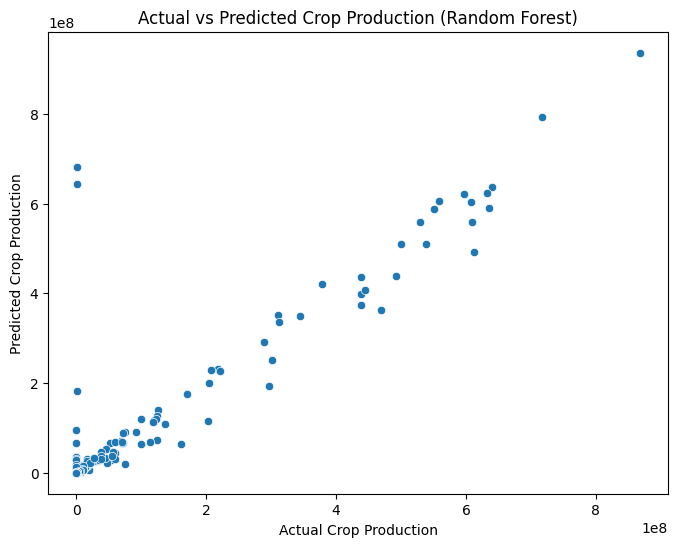

In [69]:

# Example: Scatter plot of predicted vs actual crop production for Random Forest model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_model.predict(X_test_scaled))
plt.xlabel("Actual Crop Production")
plt.ylabel("Predicted Crop Production")
plt.title("Actual vs Predicted Crop Production (Random Forest)")
plt.show()


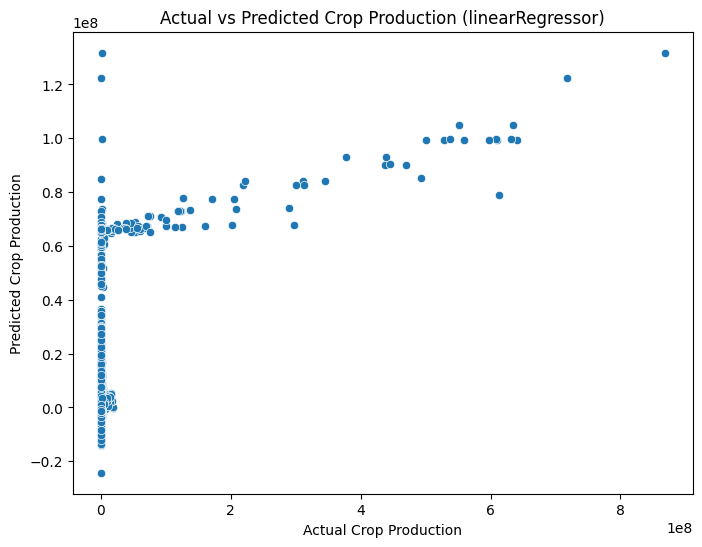

In [70]:
# Example: Scatter plot of predicted vs actual crop production linear regression model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_model.predict(X_test_scaled))
plt.xlabel("Actual Crop Production")
plt.ylabel("Predicted Crop Production")
plt.title("Actual vs Predicted Crop Production (linearRegressor)")
plt.show()

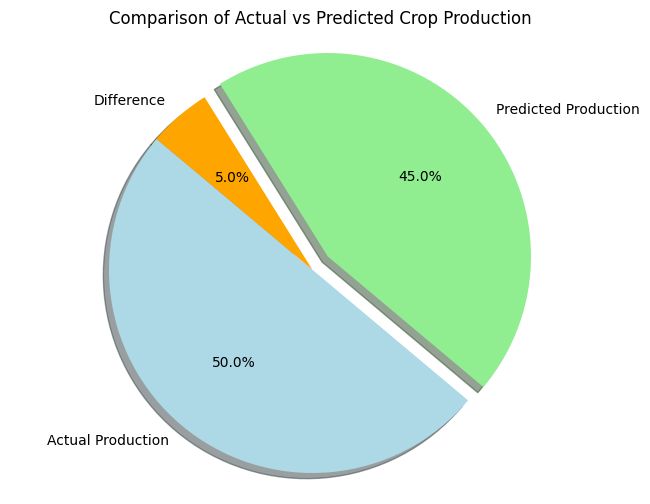

In [71]:
actual_production = 5000   
predicted_production = 4500   
# Calculate the difference between actual and predicted production
difference = abs(actual_production - predicted_production)

# Create labels for the pie chart
labels = ['Actual Production', 'Predicted Production', 'Difference']

# Corresponding values
sizes = [actual_production, predicted_production, difference]

# Colors for each section
colors = ['lightblue', 'lightgreen', 'orange']

# Explode the predicted production section to make it stand out
explode = (0, 0.1, 0)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Actual vs Predicted Crop Production')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


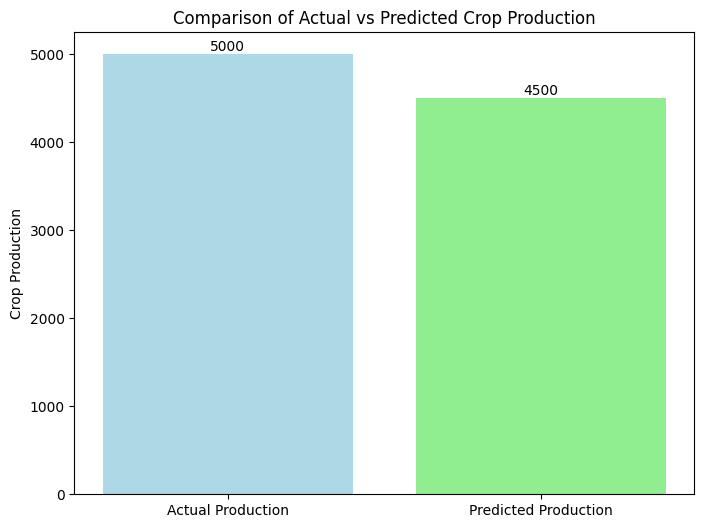

In [72]:
actual_production = 5000  # Example actual crop production
predicted_production = 4500  # Example predicted crop production

# Create labels for the bar plot
labels = ['Actual Production', 'Predicted Production']

# Corresponding values
values = [actual_production, predicted_production]

# Colors for the bars
colors = ['lightblue', 'lightgreen']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)

# Adding text labels on each bar
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

plt.title('Comparison of Actual vs Predicted Crop Production')
plt.ylabel('Crop Production')
plt.show()
